# Project #1 : Sales Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Merging 12 months of sales data into a single CSV file


In [2]:
# Merging 12 months of sales data into a single CSV file
path = "/content/drive/MyDrive/ML Datasets/Sales_Data"
files = [file for file in os.listdir(path) if file.split('.')[1] == "csv" and file.split('.')[0].startswith("Sales_")]
print(files)
print(len(files))
df_all_months = pd.DataFrame()
for file in files :
  x = pd.read_csv(f"{path}/{file}")
  df_all_months = df_all_months.append(x)

df_all_months.to_csv(f"{path}/all_data.csv",index=False)
df_all_months.head()

['Sales_January_2019.csv', 'Sales_September_2019.csv', 'Sales_March_2019.csv', 'Sales_July_2019.csv', 'Sales_February_2019.csv', 'Sales_August_2019.csv', 'Sales_June_2019.csv', 'Sales_May_2019.csv', 'Sales_November_2019.csv', 'Sales_April_2019.csv', 'Sales_October_2019.csv', 'Sales_December_2019.csv']
12


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


## Q1 : What was the best month for sale? How much was earned that month ?


In [3]:
# Read in Updated Dataframe
df = pd.read_csv(f"{path}/all_data.csv")
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [4]:
# Cleaning Data
df.isnull().sum(),df.shape

(Order ID            545
 Product             545
 Quantity Ordered    545
 Price Each          545
 Order Date          545
 Purchase Address    545
 dtype: int64, (186850, 6))

In [5]:
df[df.isnull().any(axis=1)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
664,NaN,NaN,NaN,NaN,NaN,NaN
678,NaN,NaN,NaN,NaN,NaN,NaN
797,NaN,NaN,NaN,NaN,NaN,NaN
876,NaN,NaN,NaN,NaN,NaN,NaN
1299,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
184678,NaN,NaN,NaN,NaN,NaN,NaN
184695,NaN,NaN,NaN,NaN,NaN,NaN
185042,NaN,NaN,NaN,NaN,NaN,NaN
185729,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df = df.dropna(how="all")

In [7]:
df.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [8]:
df = df[~df['Order Date'].str.startswith('Or')]

In [9]:
# Converting columns to the correct type
df['Price Each'] = pd.to_numeric(df['Price Each'])
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])

In [10]:
df.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
dtype: object

In [11]:
# Add Month Column  
df['Month'] = df['Order Date'].str.split('/').apply(lambda x : x[0]).astype('int')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1


In [12]:
# Add a Sales Column
df['Sales'] = df['Quantity Ordered']*df['Price Each']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,700.00
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,14.95
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,23.98
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,149.99
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,11.99


In [13]:
x = df.groupby('Month').sum().sort_values('Sales',ascending=False).reset_index()
x

,Month,Quantity Ordered,Price Each,Sales
0,12,28114,4.588415e+06,4.613443e+06
1,10,22703,3.715555e+06,3.736727e+06
2,4,20558,3.367671e+06,3.390670e+06
3,11,19798,3.180601e+06,3.199603e+06
4,5,18667,3.135125e+06,3.152607e+06
5,3,17005,2.791208e+06,2.807100e+06
6,7,16072,2.632540e+06,2.647776e+06
7,6,15253,2.562026e+06,2.577802e+06
8,8,13448,2.230345e+06,2.244468e+06
9,2,13449,2.188885e+06,2.202022e+06


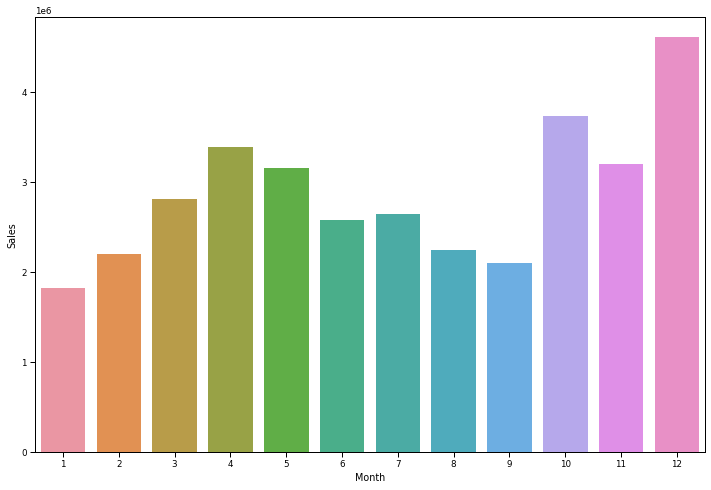

In [14]:
# Q1 : What was the best month for sale? How much was earned that month 
# Ans : 12th Month December 
# Plotting the Graph
plt.figure(figsize=(12,8))
sns.set_context('paper')
sns.barplot(x='Month',y='Sales',data=x)

## Q2: What city had the highest number of sales ? 




In [15]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,700.00
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,14.95
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,23.98
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,149.99
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,11.99


In [16]:
def get_city_state(x) :
  y = x.split(',')
  return f"{y[1]} {y[2].split()[0]}"
  
df['City'] = df['Purchase Address'].apply(lambda x : get_city_state(x) )
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,700.00,Boston MA
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,14.95,Portland OR
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco CA
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles CA
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,11.99,Austin TX


In [17]:
df['City'].unique()

array([' Boston MA', ' Portland OR', ' San Francisco CA',
       ' Los Angeles CA', ' Austin TX', ' Atlanta GA', ' Seattle WA',
       ' New York City NY', ' Dallas TX', ' Portland ME'], dtype=object)

In [18]:
x=df.groupby('City').sum().reset_index()
x

,City,Quantity Ordered,Price Each,Month,Sales
0,Atlanta GA,16602,2.779908e+06,104794,2.795499e+06
1,Austin TX,11153,1.809874e+06,69829,1.819582e+06
2,Boston MA,22528,3.637410e+06,141112,3.661642e+06
3,Dallas TX,16730,2.752628e+06,104620,2.767975e+06
4,Los Angeles CA,33289,5.421435e+06,208325,5.452571e+06
5,New York City NY,27932,4.635371e+06,175741,4.664317e+06
6,Portland ME,2750,4.471893e+05,17144,4.497583e+05
7,Portland OR,11303,1.860558e+06,70621,1.870732e+06
8,San Francisco CA,50239,8.211462e+06,315520,8.262204e+06
9,Seattle WA,16553,2.733296e+06,104941,2.747755e+06


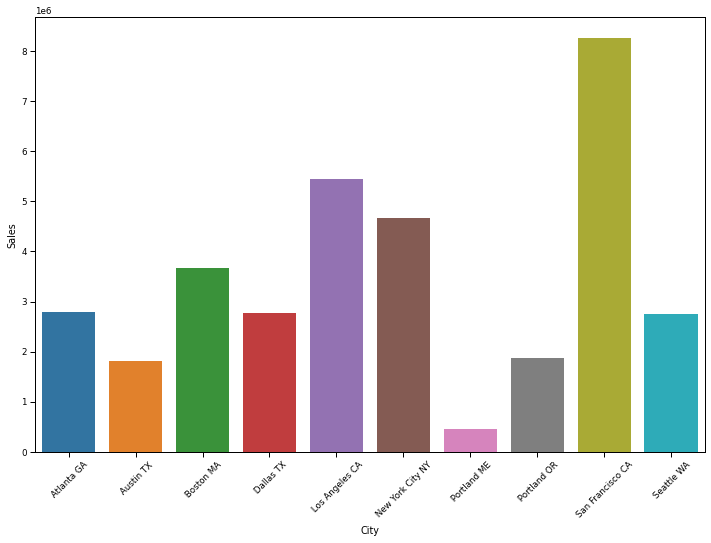

In [19]:
()# Q2: What city had the highest number of sales ? 
# A : San Francisco CA
# Graph

plt.figure(figsize=(12,8))
sns.barplot(x='City',y='Sales',data=x)
plt.xticks(rotation='45')
plt.show()

## Q3: What Time of the day should we display advertisements to maximizethe likelihood of purchase ? 

In [20]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,700.00,Boston MA
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,14.95,Portland OR
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco CA
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles CA
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,11.99,Austin TX


In [21]:
# Convert date to datetime type
df['Order Date'] = pd.to_datetime(df['Order Date'])
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,700.00,Boston MA
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,14.95,Portland OR
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco CA
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles CA
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,11.99,Austin TX


In [22]:
df.dtypes

Order ID                    object
Product                     object
Quantity Ordered             int64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
Month                        int64
Sales                      float64
City                        object
dtype: object

In [23]:
df['Month'] = df['Order Date'].dt.month
df['Hour'] = df['Order Date'].dt.hour
df['Minute'] = df['Order Date'].dt.minute
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,700.00,Boston MA,21,25
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,14.95,Portland OR,14,15
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco CA,13,33
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles CA,20,33
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,11.99,Austin TX,11,59


In [24]:
x = df.groupby('Hour').sum().reset_index()
x[:5]

,Hour,Quantity Ordered,Price Each,Month,Sales,Minute
0,0,4428,709296.70,27554,713721.27,103596
1,1,2619,458490.00,16657,460866.88,61807
2,2,1398,233833.64,8507,234851.44,32508
3,3,928,144726.42,5904,145757.89,23044
4,4,937,162058.18,6148,162661.01,26876


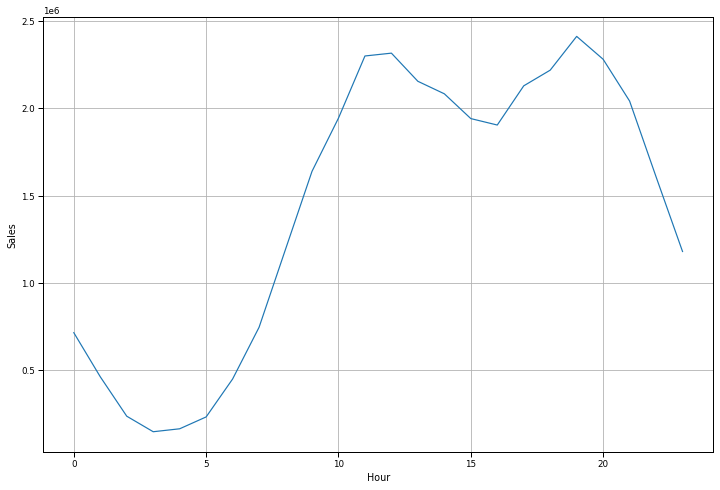

In [25]:
plt.figure(figsize=(12,8))
sns.lineplot(x='Hour',y='Sales',data=x)
plt.grid(True)

# A : Around 11AM or 7PM

## Q4: What Products are most often sold together ?

In [26]:
df = df.sort_values('Order ID')

In [27]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,700.00,Boston MA,21,25
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,14.95,Portland OR,14,15
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco CA,13,33
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles CA,20,33
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,11.99,Austin TX,11,59


In [28]:
df1 = df[df['Order ID'].duplicated(keep=False)]
df1.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
41,141275,USB-C Charging Cable,1,11.95,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",1,11.95,Austin TX,16,6
42,141275,Wired Headphones,1,11.99,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",1,11.99,Austin TX,16,6
57,141290,Apple Airpods Headphones,1,150.00,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",1,150.00,Los Angeles CA,8,25
58,141290,AA Batteries (4-pack),3,3.84,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",1,11.52,Los Angeles CA,8,25
133,141365,Vareebadd Phone,1,400.00,2019-01-10 11:19:00,"20 Dogwood St, New York City, NY 10001",1,400.00,New York City NY,11,19
134,141365,Wired Headphones,1,11.99,2019-01-10 11:19:00,"20 Dogwood St, New York City, NY 10001",1,11.99,New York City NY,11,19
154,141384,USB-C Charging Cable,1,11.95,2019-01-03 00:14:00,"223 Jackson St, Boston, MA 02215",1,11.95,Boston MA,0,14
153,141384,Google Phone,1,600.00,2019-01-03 00:14:00,"223 Jackson St, Boston, MA 02215",1,600.00,Boston MA,0,14
220,141450,Google Phone,1,600.00,2019-01-12 11:16:00,"521 Park St, San Francisco, CA 94016",1,600.00,San Francisco CA,11,16
221,141450,Bose SoundSport Headphones,1,99.99,2019-01-12 11:16:00,"521 Park St, San Francisco, CA 94016",1,99.99,San Francisco CA,11,16


In [29]:
df1['Grouped'] = df1.groupby('Order ID')['Product'].transform(lambda x : ','.join(x))
df1 = df1[['Order ID','Grouped']].drop_duplicates()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [30]:
df1.head()

,Order ID,Grouped
41,141275,"USB-C Charging Cable,Wired Headphones"
57,141290,"Apple Airpods Headphones,AA Batteries (4-pack)"
133,141365,"Vareebadd Phone,Wired Headphones"
154,141384,"USB-C Charging Cable,Google Phone"
220,141450,"Google Phone,Bose SoundSport Headphones"


In [34]:
from itertools import combinations
from collections import Counter


count = Counter()

for row in df1['Grouped'] :
  x = row.split(',')
  count.update(Counter(combinations(x,2)))

count.most_common(10)

[(('iPhone', 'Lightning Charging Cable'), 751),
 (('Google Phone', 'USB-C Charging Cable'), 744),
 (('iPhone', 'Wired Headphones'), 336),
 (('Google Phone', 'Wired Headphones'), 298),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 272),
 (('iPhone', 'Apple Airpods Headphones'), 271),
 (('Lightning Charging Cable', 'iPhone'), 264),
 (('USB-C Charging Cable', 'Google Phone'), 255),
 (('Google Phone', 'Bose SoundSport Headphones'), 161),
 (('USB-C Charging Cable', 'Wired Headphones'), 127)]

In [ ]:
# Q : What Products are most often sold together ?
# A : iPhone', 'Lightning Charging Cable' -> 751

## Q:5 What product sold the most? Why do you think it did ?

In [35]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,700.00,Boston MA,21,25
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,14.95,Portland OR,14,15
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco CA,13,33
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles CA,20,33
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,11.99,Austin TX,11,59


In [48]:
df2 = df.groupby('Product').sum().reset_index()
df3 = df.groupby('Product').mean().reset_index()
print(df2,df3)

                       Product  Quantity Ordered  ...    Hour  Minute
0                 20in Monitor              4129  ...   58764  122252
1       27in 4K Gaming Monitor              6244  ...   90916  184331
2             27in FHD Monitor              7550  ...  107540  219948
3       34in Ultrawide Monitor              6199  ...   89076  183480
4        AA Batteries (4-pack)             27635  ...  298342  609039
5       AAA Batteries (4-pack)             31017  ...  297332  612113
6     Apple Airpods Headphones             15661  ...  223304  455570
7   Bose SoundSport Headphones             13457  ...  192445  392603
8                Flatscreen TV              4819  ...   68815  142789
9                 Google Phone              5532  ...   79479  162773
10                    LG Dryer               646  ...    9326   19043
11          LG Washing Machine               666  ...    9785   19462
12    Lightning Charging Cable             23217  ...  312529  634442
13          Macbook 

[Text(0, 0, '20in Monitor'),
 Text(0, 0, '27in 4K Gaming Monitor'),
 Text(0, 0, '27in FHD Monitor'),
 Text(0, 0, '34in Ultrawide Monitor'),
 Text(0, 0, 'AA Batteries (4-pack)'),
 Text(0, 0, 'AAA Batteries (4-pack)'),
 Text(0, 0, 'Apple Airpods Headphones'),
 Text(0, 0, 'Bose SoundSport Headphones'),
 Text(0, 0, 'Flatscreen TV'),
 Text(0, 0, 'Google Phone'),
 Text(0, 0, 'LG Dryer'),
 Text(0, 0, 'LG Washing Machine'),
 Text(0, 0, 'Lightning Charging Cable'),
 Text(0, 0, 'Macbook Pro Laptop'),
 Text(0, 0, 'ThinkPad Laptop'),
 Text(0, 0, 'USB-C Charging Cable'),
 Text(0, 0, 'Vareebadd Phone'),
 Text(0, 0, 'Wired Headphones'),
 Text(0, 0, 'iPhone')]

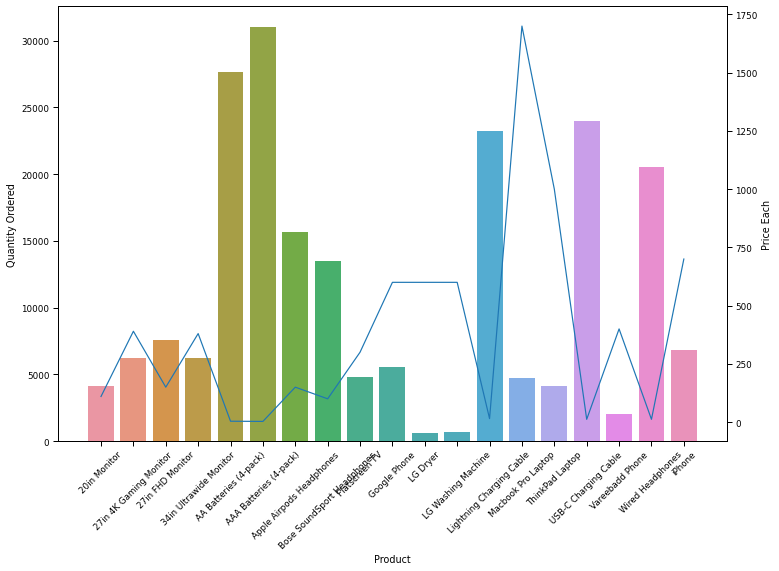

In [71]:
fig, ax = plt.subplots(figsize=(12,8))
ax1=ax.twinx()
sns.barplot(x='Product',y='Quantity Ordered',data=df2,ax=ax)
sns.lineplot(x='Product',y='Price Each',data=df3,ax=ax1)
ax.set_xticklabels(df2['Product'].values, rotation=45)

In [72]:
# Q : What product sold the most? 
# A : USB-C Charging Cable -> 21903
# Q : Why do you think it did ?
# A : Since the cost of the product is low

# Project 2